<a href="https://colab.research.google.com/github/Sniperpilot16/DSPS_MRichardson/blob/master/DSPS_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival 

In [0]:
ll84 = pd.read_csv("https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv")

In [0]:
ll84.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161.0,FT WASHINGTON AVENUE,Manhattan,891040.0,H

# Pluto

In [0]:
from __future__ import print_function, division

In [0]:
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip

--2019-10-01 22:32:00--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 23.55.187.86, 2600:1409:12:3b0::1500, 2600:1409:12:396::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|23.55.187.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82994022 (79M) [application/zip]
Saving to: ‘nyc_pluto_18v2_1_csv.zip’

nyc_pluto_18v2_1_cs 100%[===================>]  79.15M  21.7MB/s    in 3.9s    

2019-10-01 22:32:04 (20.4 MB/s) - ‘nyc_pluto_18v2_1_csv.zip’ saved [82994022/82994022]



In [0]:
mkdir "drive/My Drive/dsps"

mkdir: cannot create directory ‘drive/My Drive/dsps’: File exists


In [0]:
!unzip nyc_pluto_18v2_1_csv.zip -d "drive/My Drive/dsps"

Archive:  nyc_pluto_18v2_1_csv.zip
replace drive/My Drive/dsps/pluto_18v2_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
ls "drive/My Drive/dsps/"

pluto_18v2_1.csv  PLUTODD18v2.1.pdf  PlutoReadme18v2.1.pdf


In [0]:
rm "pluto_18v2_1.zip"

rm: cannot remove 'pluto_18v2_1.zip': No such file or directory


In [0]:
pluto18 = pd.read_csv("drive/My Drive/dsps/pluto_18v2_1.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
pluto18.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,BX,5641.0,670.0,210.0,516.0,2.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,,CITY ISLAND AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2,7.0,0.0,NaN,MINNY C INC.,53758.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59400.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,0.0,0.0,2.0,2.056411e+09,0.0,516.0,1044510.0,246734.0,4d,NaN,218 068,21810,NaN,2.056411e+09,1/5/2005,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,QN,3935.0,3.0,407.0,929.0,1001.0,25.0,19.0,11356.0,E297,109.0,210.0,4.0,5D,8-03 117 STREET,R2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"CHEN, ZHIBIN",10870.0,3130.0,0.0,3130.0,0.0,0.0,0.0,0.0,0.0,...,53083.0,0.0,0.0,1915.0,1995.0,1996.0,NaN,NaN,0.29,0.50,0.0,1.0,4.0,4.039350e+09,0.0,929.0,1025679.0,227096.0,7b,NaN,405 037,42101,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,7.0,43.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,BX,4205.0,41.0,211.0,296.0,2000.0,11.0,13.0,NaN,Q061,49.0,1410.0,2.0,2E,SEMINOLE AVENUE,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V0,11.0,0.0,NaN,EDWARD AND LORRAINE S,2369.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5361.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.90,0.0,2.0,2.0,2.042050e+09,0.0,296.0,1026345.0,249922.0,4a,NaN,220 053,21509,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,11.0,26.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,BX,2402.0,14.0,201.0,69.0,2005.0,7.0,17.0,NaN,L055,40.0,3900.0,2.0,1B,EAST 156 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,"156, LLC",3750.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81000.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,2.43,0.0,4.8,2.0,2.024020e+09,0.0,69.0,1007336.0,238351.0,6a,NaN,209N080,20905,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,23.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,SI,63.0,83.0,501.0,81.0,2006.0,31.0,49.0,10301.0,E155,120.0,400.0,5.0,2C,216 FRANKLIN AVENUE,R2,NaN,NaN,NaN,NaN,NaN,HS,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,DENNIS COTTER,3465.0,1590.0,0.0,1590.0,0.0,0.0,0.0,0.0,0.0,...,20044.0,1460.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.46,0.50,0.0,1.0,5.0,5.000630e+09,0.0,81.0,958845.0,172482.0,21a,NaN,501 082,50102,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,51.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [0]:
pd.set_option('display.max_rows', 10)
df = pd.read_csv("drive/My Drive/dsps/pluto_18v2_1.csv")
print(df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       borough   block    lot     cd  ...  basempdate  masdate  polidate  edesigdate
0           BX  5641.0  670.0  210.0  ...  12/21/2018      NaN       NaN  12/20/2018
1           QN  3935.0    3.0  407.0  ...  12/21/2018      NaN       NaN  12/20/2018
2           BX  4205.0   41.0  211.0  ...  12/21/2018      NaN       NaN  12/20/2018
3           BX  2402.0   14.0  201.0  ...  12/21/2018      NaN       NaN  12/20/2018
4           SI    63.0   83.0  501.0  ...  12/21/2018      NaN       NaN  12/20/2018
...        ...     ...    ...    ...  ...         ...      ...       ...         ...
858977      BK  7122.0   65.0  315.0  ...  12/21/2018      NaN       NaN  12/20/2018
858978      QN  2458.0   24.0  405.0  ...  12/21/2018      NaN       NaN  12/20/2018
858979      SI  7312.0   77.0  503.0  ...  12/21/2018      NaN       NaN  12/20/2018
858980      SI    43.0   62.0  501.0  ...  12/21/2018      NaN       NaN  12/20/2018
858981      SI  4226.0   10.0  502.0  ...  12/21/2018      NaN   

# Data Fusion

**select data**

In [0]:
pluto18 = pluto18.where(pluto18.borough == 'MN').dropna(subset=['borough'])

In [0]:
pluto18

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
7,MN,707.0,45.0,104.0,99.00,1039.0,2.0,3.0,10018.0,E034,10.0,5500.0,1.0,2A,512 WEST 36 STREET,C6-4,NaN,NaN,NaN,NaN,NaN,HY,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,511 WEST 35TH STREET,2469.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,994500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,10.0,10.0,1.0,1.007070e+09,0.0,99.0,984499.0,214706.0,8d,NaN,105S027,10302,E-137,0.000000e+00,NaN,NaN,1.0,18v2.1,4.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
12,MN,1486.0,4.0,108.0,132.00,7002.0,2.0,5.0,10021.0,E044,19.0,4300.0,1.0,2B,1402 YORK AVENUE,R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V1,11.0,0.0,NaN,1402 YORK AVENUE HOUS,1960.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,839250.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,0.0,10.0,1.0,1.014860e+09,0.0,132.0,997473.0,219205.0,9a,NaN,108S008,10512,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,8.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
19,MN,660.0,501.0,102.0,69.00,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,,JOE DIMAGGIO HIGHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U0,7.0,0.0,X,,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.0,0.0,1.0,1.006601e+09,0.0,69.0,979407.0,205664.0,12a,NaN,103 045,10210,NaN,0.000000e+00,NaN,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
37,MN,190.0,7508.0,101.0,33.00,3013.0,2.0,1.0,10013.0,E007,1.0,7700.0,1.0,3A,240 WEST BROADWAY,C6-2A,NaN,NaN,NaN,NaN,NaN,TMU,NaN,NaN,NaN,N,R1,2.0,0.0,NaN,,4307.0,21741.0,0.0,21741.0,0.0,0.0,0.0,0.0,0.0,...,1026271.0,0.0,302970.0,2008.0,0.0,0.0,NaN,NaN,6.60,6.02,6.0,6.5,1.0,1.001908e+09,2289.0,33.0,982556.0,201553.0,12a,NaN,101N041,10105,NaN,1.001900e+09,2/22/2012,NaN,1.0,18v2.1,1.0,15.0,NaN,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
42,MN,1261.0,60.0,105.0,96.00,1004.0,2.0,4.0,10036.0,L004,18.0,4800.0,1.0,2B,44 WEST 46 STREET,C6-4.5,NaN,NaN,NaN,NaN,NaN,MiD,NaN,NaN,NaN,N,K2,5.0,0.0,NaN,AAA KEYLOCK CO INC,2008.0,8655.0,8655.0,0.0,0.0,8655.0,0.0,0.0,0.0,...,2093850.0,0.0,0.0,1985.0,0.0,0.0,NaN,NaN,4.31,10.00,12.0,12.0,1.0,1.012610e+09,0.0,96.0,989489.0,214947.0,8d,NaN,104 040,10501,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,5.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
46,MN,1017.0,9.0,105.0,119.00,2001.0,2.0,3.0,10036.0,L004,18.0,5200.0,1.0,2A,WEST 45 STREET,C6-5,NaN,NaN,NaN,NaN,NaN,MiD,NaN,NaN,NaN,N,V1,11.0,0.0,NaN,,4686.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,980100.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,10.0,10.0,1.0,1.010170e+09,0.0,119.0,987730.0,215804.0,8d,NaN,105N046,10402,NaN,1.010170e+09,10/20/2017,NaN,1.0,18v2.1,5.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,E076,24.0,3210.0,1.0,5A,8 MANHATTAN AVENUE,R8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,C4,2.0,0.0,NaN,BH 108TH MANHATTAN TI,3550.0,14268.0,0.0,14268.0,0.0,0.0,0.0,0.0,0.0,...,510300.0,0.0,148950.0,1900.0,0.0,0.0,NaN,NaN,4.02,6.02,0.0,6.5,1.0,1.018360e+09,0.0,189.0,994273.0,228915.0,5d,NaN,107S047,10702,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,7.0,16.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
89,MN,2184.0,1.

In [0]:
pluto18.shape

(42897, 96)

In [0]:
ll84 = ll84.where(ll84.Borough == 'Manhattan').dropna(subset=['Borough'])

In [0]:
ll84.shape

(5176, 60)

**merge**

In [0]:
ll84_merge = ll84.merge(pluto18, left_on = "BBL - 10 digits", right_on = "bbl", how = "inner")
ll84_merge

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1.0,13286.0,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963.0,2.0,100.0,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2.0,28400.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969.0,12.0,100.0,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99.0,2263463.0,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929.0,1.0,100.0,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,3.0,4778226.0,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical &

In [0]:
ll84_merge.shape

(5159, 156)

## Data Exploration and cleaning 

**Extract Columns**

In [0]:
ll84_merge22 = ll84_merge[["DOF Gross Floor Area","Year Built","Number of Buildings - Self-reported","Occupancy","ENERGY STAR Score","Site EUI (kBtu/ft²)",
               "Weather Normalized Site EUI (kBtu/ft²)","Weather Normalized Site Electricity Intensity (kWh/ft²)",
               "Weather Normalized Site Natural Gas Intensity (therms/ft²)","Weather Normalized Source EUI (kBtu/ft²)",
               "Electricity Use - Grid Purchase (kBtu)","Total GHG Emissions (Metric Tons CO2e)","Property GFA - Self-Reported (ft²)",
              "Water Use (All Water Sources) (kgal)","Water Intensity (All Water Sources) (gal/ft²)","Source EUI (kBtu/ft²)",
               "bldgarea","numbldgs","numfloors","unitsres","unitstotal","yearalter1"]]

In [0]:
ll84_merge22.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,289356.0,1963.0,2.0,100.0,Not Available,305.6,303.1,37.8,Not Available,614.2,38139374.2,6962.2,762051.0,Not Available,Not Available,619.4,289356.0,1.0,31.0,0.0,50.0,0.0
1,3693539.0,1969.0,12.0,100.0,55,229.8,228.8,24.8,2.4,401.1,332365924.0,55870.4,3889181.0,Not Available,Not Available,404.3,3693539.0,6.0,22.0,0.0,1.0,1987.0
2,3693539.0,1929.0,1.0,100.0,Not Available,430.8,436.5,51.4,0,864.5,128220229.9,23865.2,716678.0,29331.1,40.93,864.5,3693539.0,6.0,22.0,0.0,1.0,1987.0
3,152765.0,1924.0,1.0,100.0,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,NaN,0.0,231342.0,Not Available,Not Available,NaN,152765.0,1.0,12.0,0.0,1.0,0.0
4,891040.0,1971.0,1.0,100.0,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,NaN,0.0,1305748.0,Not Available,Not Available,NaN,891040.0,2.0,14.0,0.0,1.0,1997.0


In [0]:
ll84_merge22.shape

(5159, 22)

In [0]:
ll84_merge_naN = ll84_merge22.apply(pd.to_numeric, errors = 'coerce')
ll84_merge_naN

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,289356.0,1963.0,2.0,100.0,NaN,305.6,303.1,37.8,NaN,614.2,38139374.2,6962.2,762051.0,NaN,NaN,619.4,289356.0,1.0,31.0,0.0,50.0,0.0
1,3693539.0,1969.0,12.0,100.0,55.0,229.8,228.8,24.8,2.4,401.1,332365924.0,55870.4,3889181.0,NaN,NaN,404.3,3693539.0,6.0,22.0,0.0,1.0,1987.0
2,3693539.0,1929.0,1.0,100.0,NaN,430.8,436.5,51.4,0.0,864.5,128220229.9,23865.2,716678.0,29331.1,40.93,864.5,3693539.0,6.0,22.0,0.0,1.0,1987.0
3,152765.0,1924.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,231342.0,NaN,NaN,NaN,152765.0,1.0,12.0,0.0,1.0,0.0
4,891040.0,1971.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1305748.0,NaN,NaN,NaN,891040.0,2.0,14.0,0.0,1.0,1997.0
5,211400.0,1932.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,179694.0,NaN,NaN,NaN,211400.0,1.0,16.0,0.0,0.0,0.0
6,2230742.0,1932.0,12.0,100.0,55.0,359.9,359.0,8.3,4.8,411.5,86335350.5,54429.8,2971874.0,NaN,NaN,414.2,2230742.0,9.0,27.0,0.0,1.0,0.0
7,245000.0,1932.0,1.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,245000.0,NaN,NaN,NaN,245000.0,1.0,10.0,0.0,3.0,1988.0
8,179130.0,1939.0,1.0,100.0,67.0,75.7,79.0,4.0,0.0,109.1,2886852.2,1204.4,204720.0,NaN,NaN,106.6,179130.0,1.0,6.0,150.0,150.0,1988.0
9,102150.0,1939.0,1.0,100.0,80.0,77.1,82.7,2.6,0.0,102.8,1081789.4,689.0,116744.0,NaN,NaN,97.7,102150.0,1.0,6.0,84.0,84.0,1988.0


In [0]:
ll84_merge_dropped = ll84_merge_naN.dropna()
ll84_merge_dropped

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
11,64827.0,1911.0,1.0,100.0,100.0,17.9,17.4,4.8,0.0,52.3,923332.2,88.8,54913.0,231.9,4.22,53.9,64827.0,1.0,13.0,18.0,20.0,0.0
16,175885.0,1973.0,2.0,100.0,40.0,56.2,58.8,10.7,0.2,138.3,6056300.2,765.3,175885.0,237.9,1.35,131.0,175885.0,2.0,13.0,115.0,116.0,0.0
17,57300.0,1908.0,1.0,100.0,100.0,6.1,5.8,0.7,0.0,10.9,98511.3,17.5,57300.0,1668.9,39.41,11.2,57300.0,1.0,8.0,49.0,49.0,1962.0
58,50120.0,1924.0,1.0,100.0,100.0,7.5,7.5,0.2,0.1,9.3,34727.3,21.1,49668.0,1976.2,39.79,9.3,50120.0,1.0,12.0,25.0,25.0,0.0
61,230565.0,1976.0,1.0,100.0,1.0,555.8,555.8,45.5,0.0,969.0,50375310.3,13317.6,324836.0,71526.5,220.19,969.0,230565.0,1.0,17.0,0.0,1.0,0.0
62,136608.0,1929.0,1.0,100.0,84.0,108.6,111.9,6.9,0.3,164.1,4148446.0,1367.8,174348.0,10175.0,58.36,161.7,136608.0,1.0,11.0,0.0,1.0,0.0
65,84442.0,1970.0,1.0,100.0,81.0,85.6,89.8,9.8,0.0,161.7,2898517.5,589.9,84508.0,1753.4,20.75,159.6,84442.0,1.0,10.0,0.0,6.0,0.0
73,307312.0,1981.0,1.0,100.0,100.0,8.1,8.2,2.0,0.0,22.6,1997060.6,207.8,298336.0,11291.1,37.85,22.5,307312.0,2.0,20.0,0.0,715.0,0.0
102,102314.0,1969.0,1.0,100.0,3.0,388.3,376.8,40.3,1.1,703.0,19460918.5,3849.7,138068.0,13224.2,95.78,721.5,102314.0,1.0,9.0,0.0,1.0,1985.0
103,59131.0,1939.0,1.0,100.0,100.0,2.6,2.6,0.6,0.0,7.1,111531.5,12.0,54100.0,7874.7,145.56,7.1,59131.0,1.0,7.0,38.0,43.0,0.0


In [0]:
ll84_merge_dropped.shape  

(2044, 22)

In [0]:
ll84_merge_naN.describe()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,5.159000e+03,5159.000000,5159.000000,5159.000000,4046.000000,5105.000000,4603.000000,4883.000000,4059.000000,4603.000000,5.084000e+03,5.143000e+03,5.159000e+03,3.377000e+03,3377.000000,5105.000000,5.158000e+03,5158.000000,5158.000000,5158.000000,5158.000000,5158.000000
mean,2.158109e+05,1943.908122,1.056019,98.521031,58.670539,253.257747,267.631132,10.412062,0.412146,382.708777,8.555421e+06,4.712252e+03,2.084366e+05,1.480638e+04,94.419751,365.306817,2.078910e+05,1.329585,15.547402,90.037418,103.520938,1098.362737
std,3.234412e+05,33.085723,0.774348,8.263491,30.818797,3129.930289,3283.632247,58.859781,2.628059,3994.716896,2.495578e+07,8.927457e+04,3.104681e+05,1.485301e+05,1128.360116,3808.919009,3.121431e+05,2.079928,10.228992,189.308627,191.184512,989.727498
min,5.002800e+04,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.026250e+04,1920.000000,1.000000,100.000000,33.000000,61.900000,64.900000,4.800000,0.000000,110.800000,1.539457e+06,4.002500e+02,7.221900e+04,2.378000e+03,22.660000,106.900000,6.854750e+04,1.000000,8.000000,0.000000,25.000000,0.000000
50%,1.143300e+05,1930.000000,1.000000,100.000000,66.000000,77.300000,80.800000,7.300000,0.300000,143.200000,3.177202e+06,6.545000e+02,1.150000e+05,4.330500e+03,35.990000,139.400000,1.112650e+05,1.000000,13.000000,53.000000,62.000000,1980.000000
75%,2.161625e+05,1967.000000,1.000000,100.000000,85.000000,98.500000,102.000000,12.300000,0.600000,188.100000,7.258065e+06,1.291900e+03,2.134355e+05,8.309200e+03,53.840000,184.900000,2.099450e+05,1.000000,19.000000,107.000000,119.000000,1988.000000
max,8.942176e+06,2016.000000,35.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,131.000000,152001.300000,1.037256e+09,4.764456e+06,8.942176e+06,6.376003e+06,57699.300000,152001.300000,8.942176e+06,38.000000,102.000000,8764.000000,8812.000000,2017.000000


In [0]:
ll84_merge_dropped.describe()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03,2044.000000,2.044000e+03,2.044000e+03,2044.000000,2044.000000,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,1.800499e+05,1944.097358,1.026419,99.060665,57.454501,179.519472,182.952446,10.828376,0.347701,282.695205,7.417714e+06,1727.084393,1.834298e+05,1.520801e+04,86.745225,280.406898,1.743071e+05,1.136497,14.504892,86.314579,99.047456,1094.831703
std,2.426959e+05,34.124614,0.367935,5.202529,30.424238,3024.806998,3024.763020,90.161639,0.386811,3746.045382,2.721299e+07,14586.701420,2.516655e+05,1.228927e+05,488.899493,3749.437950,2.334882e+05,0.695738,9.104346,123.580062,125.353668,989.810792
min,5.002800e+04,1827.000000,1.000000,0.000000,1.000000,2.600000,2.600000,0.000000,0.000000,5.600000,1.501000e+02,12.000000,1.995400e+04,0.000000e+00,0.000000,6.200000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.703825e+04,1920.000000,1.000000,100.000000,33.000000,63.700000,66.700000,4.500000,0.000000,109.800000,1.384589e+06,385.100000,6.933925e+04,2.506025e+03,25.217500,106.425000,6.563200e+04,1.000000,8.000000,0.000000,37.000000,0.000000
50%,1.037690e+05,1929.000000,1.000000,100.000000,64.000000,77.650000,81.300000,6.800000,0.300000,139.300000,2.772684e+06,604.700000,1.033400e+05,4.410800e+03,37.535000,136.500000,1.009690e+05,1.000000,12.000000,60.000000,67.000000,1980.000000
75%,1.820232e+05,1970.000000,1.000000,100.000000,83.000000,98.125000,101.625000,11.800000,0.600000,181.725000,6.004705e+06,1091.375000,1.852130e+05,8.151900e+03,56.857500,179.825000,1.779970e+05,1.000000,17.000000,104.000000,115.000000,1988.000000
max,2.689635e+06,2016.000000,12.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,8.400000,152001.300000,1.037256e+09,567440.800000,2.577575e+06,3.414616e+06,11175.440000,152001.300000,2.689635e+06,14.000000,66.000000,1689.000000,1706.000000,2017.000000


**Assess Impack of Data Wrangling**



Lost approximately 3000 rows from the 5159 we started with after merging the data frames. 

By using a two-sample z test, we were able to see the differences between the full and reduced data sets. 


Since we expected the two datasets to produce the same result, our mu values were identical resulting in a delta-mu of 0. 

In [0]:
#setting the confidence limit before the test (2-sigma)
confidence = 2

# doing the Z-test for a few different categories of the data frame
for c in ['Year Built','Occupancy','Electricity Use - Grid Purchase (kBtu)', 'numfloors', 'ENERGY STAR Score', 'Weather Normalized Site EUI (kBtu/ft²)']:
  
  print('Doing the Z-test for ',c)
  
  set1 = ll84_merge[c].apply(pd.to_numeric,errors='coerce').dropna()
  set2 = ll84_merge[c].apply(pd.to_numeric,errors='coerce').dropna()
  
  xbar1 = set1.mean()
  xbar2 = set2.mean()
  
  print('average of ',c,'for the complete set: ',xbar1)
  print('average of ',c,'for the reducted set: ',xbar2)
  
  var1 = set1.var()
  var2 = set2.var()
  
  n1 = set1.count()
  n2 = set2.count()
#  print(n1, n2)
  z = (xbar1 - xbar2) / (var1/n1 + var2/n2)**0.5
  print('Z value for this test', z)
  print('Is there a signficant deviation from the population?')
  if np.abs(z) < confidence:
    print('No')
  else:
    print('Yes')
    
  print('\n\n')

Doing the Z-test for  Year Built
average of  Year Built for the complete set:  1943.9081217290172
average of  Year Built for the reducted set:  1943.9081217290172
Z value for this test 0.0
Is there a signficant deviation from the population?
No



Doing the Z-test for  Occupancy
average of  Occupancy for the complete set:  98.52103120759837
average of  Occupancy for the reducted set:  98.52103120759837
Z value for this test 0.0
Is there a signficant deviation from the population?
No



Doing the Z-test for  Electricity Use - Grid Purchase (kBtu)
average of  Electricity Use - Grid Purchase (kBtu) for the complete set:  8555420.98743116
average of  Electricity Use - Grid Purchase (kBtu) for the reducted set:  8555420.98743116
Z value for this test 0.0
Is there a signficant deviation from the population?
No



Doing the Z-test for  numfloors
average of  numfloors for the complete set:  15.547402093834819
average of  numfloors for the reducted set:  15.547402093834819
Z value for this test

# Plot WNEC

In [0]:
ll84_dropped_arrayjk = ll84_merge_dropped[ll84_merge_dropped["Weather Normalized Site EUI (kBtu/ft²)"] > 0.1]
ll84_dropped_array = np.log10(ll84_dropped_arrayjk["Weather Normalized Site EUI (kBtu/ft²)"])
ll84_dropped_array






11      1.240549
16      1.769377
17      0.763428
58      0.875061
61      2.744919
62      2.048830
65      1.953276
73      0.913814
102     2.576111
103     0.414973
104     2.203848
106     2.003461
107     1.235528
109     0.740363
110     1.897077
111     2.346744
122     1.892651
123     1.865104
127     1.979093
131     1.176091
132     1.385606
133     1.320146
142     1.680336
150     2.022016
152     2.024896
164     1.748963
168     1.637490
170     2.043755
171     2.081347
174     2.006466
          ...   
5072    2.069668
5075    1.959518
5079    1.907411
5081    1.967080
5087    1.849419
5088    1.771587
5097    2.133858
5098    2.055378
5100    2.101059
5102    1.915927
5109    1.614897
5115    1.876218
5117    1.394452
5120    1.953276
5123    1.773055
5124    1.819544
5125    1.982271
5126    1.863323
5127    1.863323
5128    1.858537
5131    1.813581
5132    1.959518
5135    1.868056
5136    1.968483
5139    2.382377
5140    1.953276
5149    1.826723
5154    1.1367

In [0]:
ll84_dropped_array.shape

(2044,)

In [0]:
ll84_arrayjk = ll84_merge_naN[ll84_merge_naN["Weather Normalized Site EUI (kBtu/ft²)"] > 0.1]
ll84_array = np.log10(ll84_arrayjk["Weather Normalized Site EUI (kBtu/ft²)"])
ll84_array

0       2.481586
1       2.359456
2       2.639984
6       2.555094
8       1.897627
9       1.917506
10      1.369216
11      1.240549
14      1.429752
16      1.769377
17      0.763428
18      0.832509
19      1.482874
20      1.534026
22      1.865696
26      1.844477
29      3.641216
44     -0.522879
54      1.056905
56      0.041393
58      0.875061
60      2.033826
61      2.744919
62      2.048830
63      2.038620
65      1.953276
66      1.804821
67      2.085291
68      2.401401
69      2.176091
          ...   
5123    1.773055
5124    1.819544
5125    1.982271
5126    1.863323
5127    1.863323
5128    1.858537
5129    1.506505
5131    1.813581
5132    1.959518
5133    1.437751
5134    1.938019
5135    1.868056
5136    1.968483
5137    1.931458
5138    1.250420
5139    2.382377
5140    1.953276
5142    1.993877
5143    2.051538
5145    1.968483
5146    2.012415
5147    1.969416
5149    1.826723
5150    2.068928
5152    1.977724
5153    1.936011
5154    1.136721
5155    1.9415

In [0]:
ll84_array.shape

(4590,)

Text(0, 0.5, 'Count')

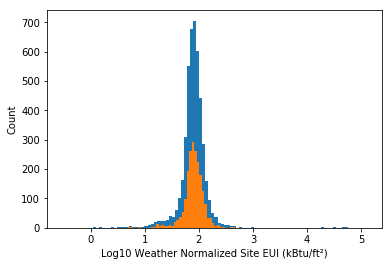

In [0]:
pl.hist(ll84_array, 100)
pl.hist(ll84_dropped_array, 100)
pl.xlabel("Log10 Weather Normalized Site EUI (kBtu/ft²)")
pl.ylabel("Count")

In [0]:
ll84_merge

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1.0,13286.0,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963.0,2.0,100.0,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2.0,28400.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969.0,12.0,100.0,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99.0,2263463.0,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929.0,1.0,100.0,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,3.0,4778226.0,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical &

In [0]:
ll84_merge.dropna(how='all')

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1.0,13286.0,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963.0,2.0,100.0,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2.0,28400.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969.0,12.0,100.0,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99.0,2263463.0,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929.0,1.0,100.0,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,3.0,4778226.0,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical &

In [0]:
ll84_merge.dropna(subset = ["Weather Normalized Site EUI (kBtu/ft²)"])

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1.0,13286.0,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963.0,2.0,100.0,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2.0,28400.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969.0,12.0,100.0,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99.0,2263463.0,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929.0,1.0,100.0,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,3.0,4778226.0,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical &

In [0]:
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
ll84_merge_wnec = ll84_merge[np.isfinite(ll84_merge[wnec].apply(pd.to_numeric,errors = 'coerce'))]
ll84_merge_wnec.shape

(4603, 156)

# Analysis: Owner Investigation



In [0]:
ll84_max_energy = ll84_merge_wnec[ll84_merge_wnec[wnec]==np.max(ll84_merge_wnec[wnec])]
ll84_max_energy

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
81,126.0,2826188.0,Warren Weaver Hall,3616399,New York University: Washington Square,1.005350e+09,1005350036,1008627,251 Mercer Street,Not Available,10012,17.0,WEST 3 STREET,Manhattan,119170.0,College/University,College/University,College/University,158590.0,Not Available,Not Available,Not Available,Not Available,1966.0,1.0,100.0,Whole Building,Not Available,Not Available,9915.6,9958.6,44,94.3,10755.3,Not Available,5.28183967E7,Not Available,Not Available,Not Available,Not Available,...,14182650.0,2421000.0,14182650.0,1975.0,0.0,0.0,NaN,NaN,5.43,3.44,0.0,6.5,1.0,1.005350e+09,0.0,5501.0,985450.0,204752.0,12c,NaN,103 008,10207,NaN,0.0,NaN,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


The building with the higest Energy Consumption

In [0]:
ll84_owned = ll84_merge_wnec[ll84_merge_wnec["Parent Property Id"] == np.max(ll84_max_energy["Parent Property Id"])]
ll84_owned

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
72,117.0,2921191.0,"Silver Tower 1,2&Garage",3616399,New York University: Washington Square,1.005240e+09,1005240066,1008243,110 Bleeker Street,Not Available,10012,100.0,BLEECKER STREET,Manhattan,518647.0,Multifamily Housing,"Multifamily Housing, Parking",Multifamily Housing,454925.0,Parking,62351,Not Available,Not Available,1966.0,1.0,100.0,Another configuration,Whole Building,100,5.4,5.5,1,0,12.8,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,33180300.0,14760000.0,33180300.0,1967.0,2015.0,2016.0,NaN,INDIVIDUAL LANDMARK,2.76,6.02,2.0,6.5,1.0,1.005240e+09,0.0,5501.0,984817.0,204067.0,12c,NaN,103 008,10206,R-218,1.005240e+09,7/29/2016,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
73,118.0,2825704.0,Mercer Street Residence,3616399,New York University: Washington Square,1.005320e+09,1005320008,1066869;1086637,240 Mercer Street,Not Available,10012,246.0,MERCER STREET,Manhattan,307312.0,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,298336.0,Not Available,Not Available,Not Available,Not Available,1981.0,1.0,100.0,Whole Building,Not Available,100,8.1,8.2,2,0,22.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,30086550.0,2326500.0,30086550.0,1980.0,0.0,0.0,NoHo Historic District,NaN,7.68,6.02,6.0,6.5,1.0,1.005320e+09,0.0,5501.0,985512.0,204401.0,12c,NaN,103 009,10207,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
74,119.0,2694253.0,1 Washington Square Village,3616399,New York University: Washington Square,1.005330e+09,1005330001,1077833,1 Washington Square Village,Not Available,10012,1.0,WASHINGTON SQ VLLGE,Manhattan,1485916.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,306659.0,Not Available,Not Available,Not Available,Not Available,1959.0,1.0,100.0,Whole Building,Whole Building,100,16.1,16.2,4.2,0,47,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,42909300.0,6224742.0,32611068.0,1959.0,1985.0,0.0,NaN,NaN,5.60,6.02,2.0,6.5,1.0,1.005330e+09,0.0,5501.0,985027.0,204534.0,12c,NaN,103 008,10207,R-218,0.000000e+00,NaN,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
75,120.0,2706483.0,3 Washington Square Village,3616399,New York University: Washington Square,1.005330e+09,1005330001,1077835,3 Washington Square Village,Not Available,10012,1.0,WA

Buildings owned by New York University: Washington Square in Manhattan 

In [0]:
ll84_top_30 = ll84_merge_wnec
ll84_top_30[wnec] = ll84_top_30[wnec].astype(float)
ll84_top_30 = ll84_top_30.nlargest(30, wnec)
ll84_top_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
3593,4455.0,2946993.0,St. Mary's Home for Working Girls,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1.014270e+09,1-01427-0011,1043968,225 East 72nd Street,Not Available,10021,225.0,EAST 72 STREET,Manhattan,95267.0,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,67655.0,Not Available,Not Available,Not Available,Not Available,1960.0,1.0,100.0,Whole Building,Not Available,1,126307.4,126307.4,7.3,0,152001.3,Not Available,Not Available,Not Available,Not Available,Not Available,8543595494,...,9298350.0,2466000.0,9298350.0,1966.0,0.0,0.0,NaN,NaN,10.25,10.00,0.0,10.0,1.0,1.014270e+09,0.0,126.0,995533.0,219627.0,8c,NaN,108S005,10510,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,8.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2962,3760.0,4043349.0,Rolex Realty Company Inc,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1.012880e+09,1012880069,1035721,665 Fifth Ave,Not Available,10022,665.0,5 AVENUE,Manhattan,122596.0,Office,"Office, Retail Store",Office,109514.0,Retail Store,13857,Not Available,Not Available,1973.0,1.0,100.0,Whole Building,Whole Building,Not Available,95560.2,88701.1,21.9,Not Available,106855.6,Not Available,Not Available,Not Available,Not Available,Not Available,11780121010,...,56767500.0,0.0,0.0,1912.0,1975.0,0.0,NaN,NaN,11.09,10.00,15.0,15.0,1.0,1.012880e+09,0.0,102.0,991009.0,216200.0,8c,Y,1.06E+39,10503,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,5.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3081,3889.0,5870209.0,950 Third Avenue Company,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1.013110e+09,1-01311-0040,Not Available,950 3rd Ave,Not Available,10022,950.0,3 AVENUE,Manhattan,313200.0,Office,Office,Office,320588.0,Not Available,Not Available,Not Available,Not Available,1971.0,1.0,90.0,"Tenant Cooling, Common Area Hot Water, Common ...",Whole Building,Not Available,78360.1,77493.8,14.1,Not Available,93321.5,Not Available,Not Available,Not Available,Not Available,Not Available,25105835480,...,52110900.0,0.0,0.0,1977.0,1989.0,0.0,NaN,NaN,25.70,10.00,10.0,10.0,1.0,1.013110e+09,0.0,11203.0,993089.0,216239.0,8c,Y,1.06E+46,10505,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2872,3663.0,4390425.0,4 W 58th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1.012730e+09,1-01273-0044,1035074,4 W 58th Stre

The top 30 buildings in Manhattan that consume the most energy 

In [0]:
print("Owner of the highest consuming building is: ", ll84_merge_wnec["Parent Property Name"][81])
print("This owner owns ", len(ll84_owned["Order"]), " buildings in Manhattan")

Owner of the highest consuming building is:  New York University: Washington Square
This owner owns  27  buildings in Manhattan


**Find average building consumption by owner**


In [43]:
ll84_Avg_Energy_Working = ll84_merge_wnec[['ownername',wnec]]
testObject = ll84_Avg_Energy_Working.groupby('ownername')

meanFrame = testObject.mean()
countFrame = testObject.count()

meanFrame.insert(1, 'count',countFrame[wnec])
meanFrame.reset_index()

meanFrame = meanFrame[meanFrame['count'] != 1]

meanFrame = meanFrame.iloc[1:]

meanFrame

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
125 PARK OWNER LLC,103.450000,2
1325 FIFTH AVENUE LLC,109.150000,2
161 HOLDING LTD,96.500000,3
2-12 PINEHURST LLC,79.850000,2
207 SHERMAN ASSOCIATE,80.625000,4
207-211 FO LLC,59.200000,2
"32-42 BROADWAY OWNER,",94.750000,2
373-381 PAS ASSOCIATE,684.350000,2
378 WEA OWNER LLC,71.250000,2


In [45]:
highest_Avg = meanFrame[meanFrame[wnec] == np.max(meanFrame[wnec])]
highest_Avg

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
COLUMBIA UNIVERSITY,1459.233333,3


In [46]:
highest_Count = meanFrame[meanFrame['count'] == np.max(meanFrame['count'])]
highest_Count

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
TRUSTEES OF COLUMBIA,43.086667,45
